In [ ]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm  # statsmodels  

In [ ]:
df =  pd.read_csv("AirPassengers.csv", index_col=0)
df.head()

,#Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


In [ ]:
df.index.min()

'1949-01'

In [ ]:
df.index.max()

'1960-12'

In [ ]:
df.index

Index(['1949-01', '1949-02', '1949-03', '1949-04', '1949-05', '1949-06',
       '1949-07', '1949-08', '1949-09', '1949-10',
       ...
       '1960-03', '1960-04', '1960-05', '1960-06', '1960-07', '1960-08',
       '1960-09', '1960-10', '1960-11', '1960-12'],
      dtype='object', name='Month', length=144)

In [ ]:
df.shape

(144, 1)

In [ ]:
df.index = pd.to_datetime(df.index)  #### This is very imp - >>> Date or Datetime as index -- convert that into proper datetime


# pd.to_datetime

In [ ]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [ ]:
df.columns = ['Number of Passengers']
df.head()

,Number of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


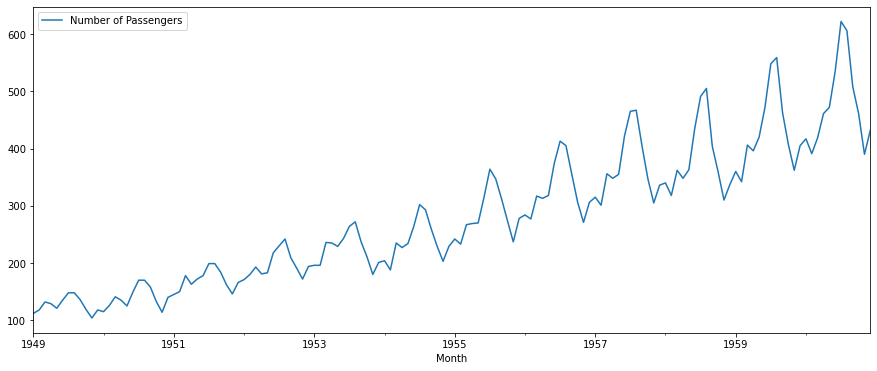

In [ ]:
df.plot(figsize = (15,6))
plt.show()

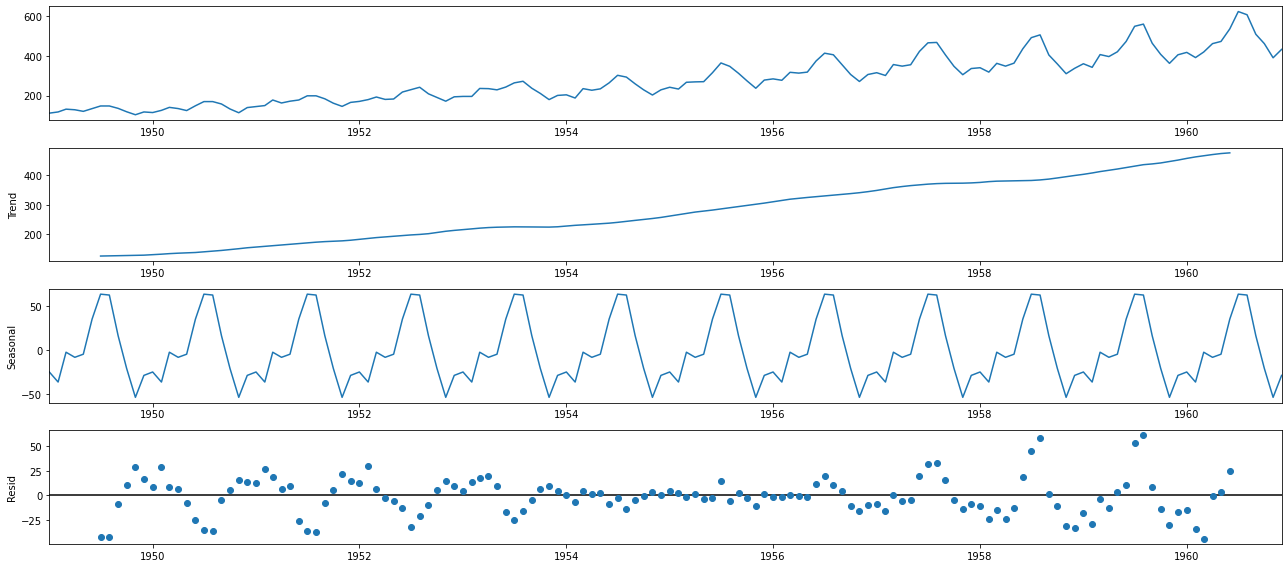

In [ ]:
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 18,8
decomposition = sm.tsa.seasonal_decompose(df, model = "additive")
fig = decomposition.plot()

In [ ]:
df.head(n=20)

,Number of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


## Simple Moving Average Model

In [ ]:
df_ma = df.copy()

# windows function 
# rolling 

df_ma['SMA_12'] = df_ma.rolling(window = 12).mean()
df_ma.head(20)

,Number of Passengers,SMA_12
Month,,
1949-01-01,112,NaN
1949-02-01,118,NaN
1949-03-01,132,NaN
1949-04-01,129,NaN
1949-05-01,121,NaN
1949-06-01,135,NaN
1949-07-01,148,NaN
1949-08-01,148,NaN
1949-09-01,136,NaN


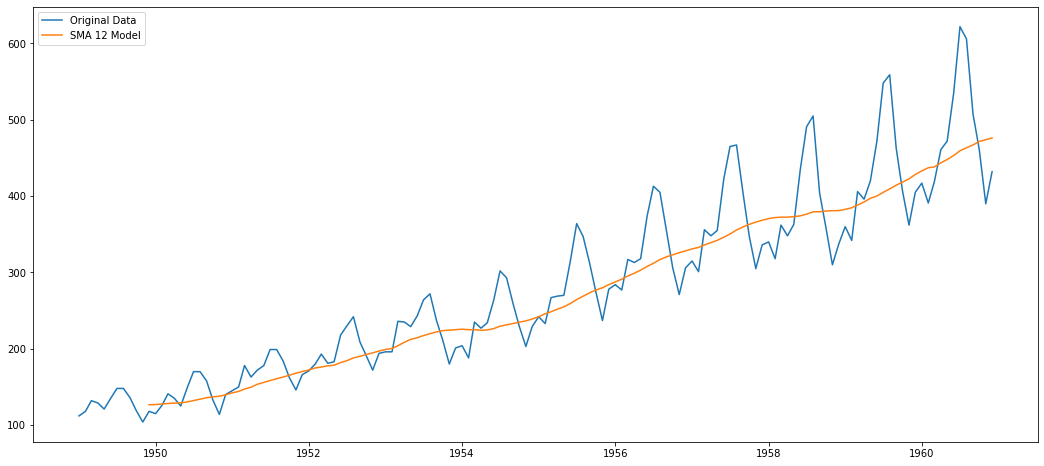

In [ ]:
plt.plot(df_ma['Number of Passengers'], label = 'Original Data')
plt.plot(df_ma['SMA_12'], label = "SMA 12 Model")
plt.legend()
plt.show()

In [ ]:

def mean_absolute_percent_error(y_true, y_pred):
    return np.mean(np.abs((y_true-y_pred)/y_true)) *100

In [ ]:
mean_absolute_percent_error(df_ma['Number of Passengers'], df_ma['SMA_12'])

10.778519137583197

## Stationarity Check using ADF TEST

NULL HYPOTHESIS - Time Series is not stationary

Alternate Hypothesis  - Time Series is stationary


p value > 0.05 --- >> fail to reject null hypothesis 

In [ ]:
import statsmodels.tsa.stattools as ts

adf_test = ts.adfuller(df)

print("p-value % 0.04f" % adf_test[1])

p-value  0.9919


**OBSERVATION**: p-value is greater than 0.05 so failed to reject NULL hypothesis which means Time Series is not stationary.

In [ ]:
df.head()

,Number of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
# Let's a one order differencing


df_1 = df.diff()

df_1.head()

# df  - df_1 by doing one order difference - in hope that this will make my TS stationary 

,Number of Passengers
Month,
1949-01-01,NaN
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0


In [ ]:
df_1.dropna(inplace=True)

In [ ]:
import statsmodels.tsa.stattools as ts

adf_test = ts.adfuller(df_1)

print("p-value % 0.04f" % adf_test[1])

p-value  0.0542


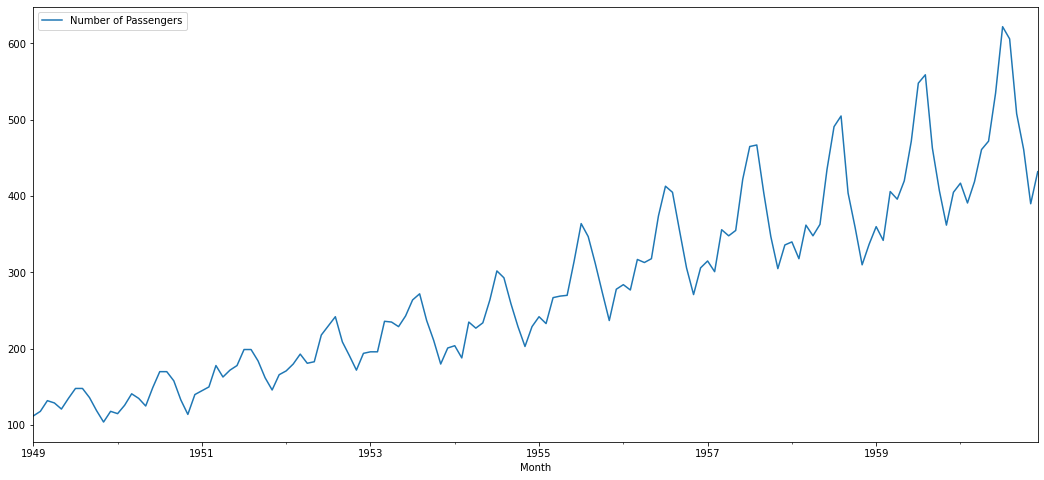

In [ ]:
df.plot()

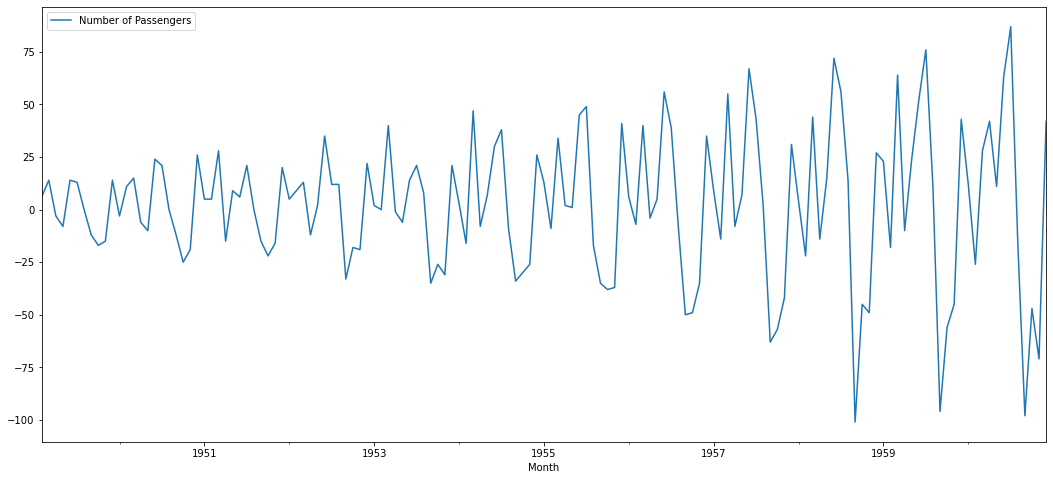

In [ ]:
df_1.plot()